In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Load the datasets
train_url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv'
test_url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv'


In [3]:
train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

In [4]:
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
train_data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
train_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
# Encode categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


In [8]:
for var in categorical_vars:
    le = LabelEncoder()
    train_data[var] = le.fit_transform(train_data[var])
    if var in test_data.columns:
        test_data[var] = le.transform(test_data[var])

In [9]:
# Split the training data into training and validation sets
X = train_data.drop(['ID', 'subscribed'], axis=1)
y = train_data['subscribed']

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale numerical variables
scaler = StandardScaler()
numerical_vars = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])
X_val[numerical_vars] = scaler.transform(X_val[numerical_vars])
test_data[numerical_vars] = scaler.transform(test_data[numerical_vars])

In [12]:
# Function to evaluate models
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
    print(classification_report(y_val, y_pred))
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [14]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

Training Logistic Regression...
Evaluating Logistic Regression...
Accuracy: 0.8900473933649289
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5599
           1       0.56      0.24      0.33       731

    accuracy                           0.89      6330
   macro avg       0.73      0.61      0.64      6330
weighted avg       0.87      0.89      0.87      6330



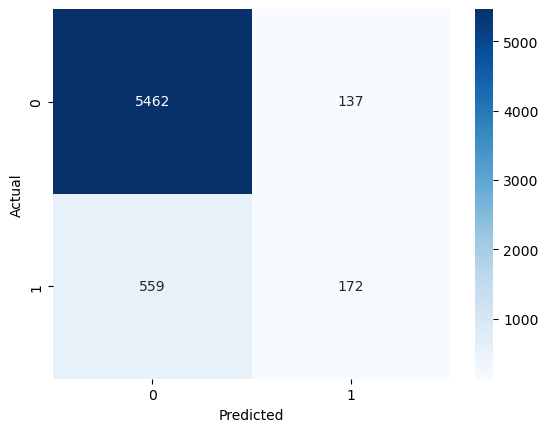

Training Decision Tree...
Evaluating Decision Tree...
Accuracy: 0.8654028436018958
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      5599
           1       0.43      0.47      0.45       731

    accuracy                           0.87      6330
   macro avg       0.68      0.69      0.68      6330
weighted avg       0.87      0.87      0.87      6330



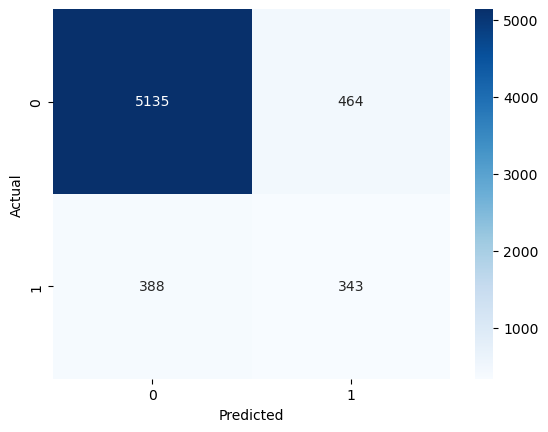

Training Random Forest...
Evaluating Random Forest...
Accuracy: 0.9050552922590838
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5599
           1       0.63      0.42      0.51       731

    accuracy                           0.91      6330
   macro avg       0.78      0.70      0.73      6330
weighted avg       0.89      0.91      0.90      6330



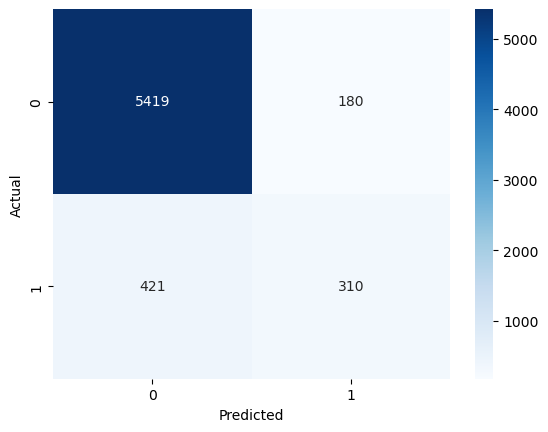

Training Gradient Boosting...
Evaluating Gradient Boosting...
Accuracy: 0.9001579778830964
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5599
           1       0.61      0.38      0.47       731

    accuracy                           0.90      6330
   macro avg       0.77      0.68      0.71      6330
weighted avg       0.89      0.90      0.89      6330



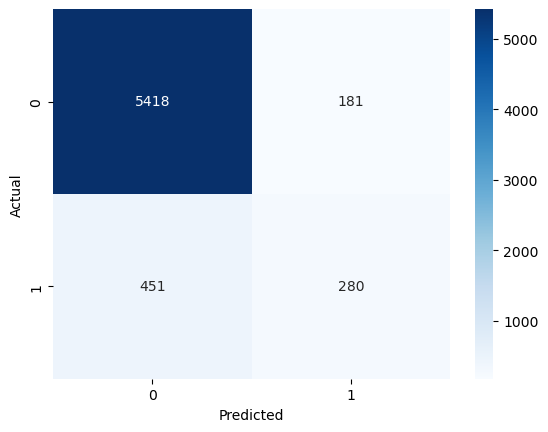

In [15]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    print(f"Evaluating {model_name}...")
    evaluate_model(model, X_val, y_val)

In [16]:
# Select the best model (example: RandomForest)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Make predictions on the test data
test_predictions = best_model.predict(test_data.drop(['ID'], axis=1))

# Save the predictions to a CSV file
submission = pd.DataFrame({'ID': test_data['ID'], 'Subscribed': test_predictions})
submission.to_csv('term_deposit_predictions.csv', index=False)
print("Predictions saved to term_deposit_predictions.csv")

Predictions saved to term_deposit_predictions.csv
